#Лабораторная работа
Решите пожалуйста следующие задачи.
1. Примените алгоритм KNN (k-ближайших соседей) для данных по
заболеваемости сахарным диабетом. Датасет представлен по ссылке.
Выходной столбец “outcome” принимает значения 0 или 1 и является
классификатором текущего набора данных.
- имеется диабет (значение 1)
- заболевание отсутствует (значение 0)
Используйте все остальные столбцы как data features (входные числовые
данные) для адаптации модели kNN.
Рассчитайте модель kNN для k = 5, 10, 15, 20, 25. Укажите объем тестового
набора данных равным 25% от общего количества данных.
Укажите score модели и постройте визуализацию обученной
классификации для указанных k.
2. Постройте модель множественной линейной регрессии для атрибутов X =
{SkinThickness, BMI} и Y = {Insulin} из датасета предыдущего задания.
Укажите score модели и предоставьте значения b, a1, a2 формулы:
y = b + a1*x1 + a2*x2
3. Примените к указанным данным любую одну модель (решите сами - для задачи
классификации или задачи регрессии) из списка ниже
- SVM
- DecisionTree
- Полиномиальная регрессия

# Импорт библиотек

In [45]:
import gdown
import numpy as np
import pandas as pd

import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.feature_selection import SelectKBest # выбор признаков
from sklearn.feature_selection import chi2 # выбор по Хи квадрат

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, r2_score

# Загрузка данных

In [46]:
url = 'https://raw.githubusercontent.com/AlexPolus/AI_architecture/main/laboratory_work_classical_machine_learning/diabetes.csv'
dataset = pd.read_csv(url)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
dataset.isna().mean()

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

In [48]:
# привести наименования к нижнему регистру, пробелы к _, skinThickness -> skinthickness,
# Skin Thickness(type01) -> skin_thickness_type01
dataset.columns = [col.lower() for col in dataset.columns]
dataset.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

In [49]:
# Разделение X (data features) и y (outcome)
# Разделение нужно для задачи классификации

X = dataset.drop(columns=['outcome'])
y = dataset['outcome']

# Исследовние данных

In [50]:
px.box(X) # построить распределение для всех числовых переменных

In [51]:
X.describe(percentiles=[0.1, 0.25,0.5, 0.75, 0.9]).T

,count,mean,std,min,10%,25%,50%,75%,90%,max
pregnancies,768.0,3.845052,3.369578,0.000,0.000,1.00000,3.0000,6.00000,9.0000,17.00
glucose,768.0,120.894531,31.972618,0.000,85.000,99.00000,117.0000,140.25000,167.0000,199.00
bloodpressure,768.0,69.105469,19.355807,0.000,54.000,62.00000,72.0000,80.00000,88.0000,122.00
skinthickness,768.0,20.536458,15.952218,0.000,0.000,0.00000,23.0000,32.00000,40.0000,99.00
insulin,768.0,79.799479,115.244002,0.000,0.000,0.00000,30.5000,127.25000,210.0000,846.00
bmi,768.0,31.992578,7.884160,0.000,23.600,27.30000,32.0000,36.60000,41.5000,67.10
diabetespedigreefunction,768.0,0.471876,0.331329,0.078,0.165,0.24375,0.3725,0.62625,0.8786,2.42
age,768.0,33.240885,11.760232,21.000,22.000,24.00000,29.0000,41.00000,51.0000,81.00


# Подготовка данных

In [52]:
# нормализация
# MinMax
# StandardScalar
# Robust
scalar_test = StandardScaler()
features_arr = scalar_test.fit_transform(X, y)
print(features_arr)
normalised_X = pd.DataFrame(features_arr, columns=X.columns)
print(normalised_X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...  

In [53]:
px.box(normalised_X)

In [54]:
minmax_test = MinMaxScaler()
features_arr_min_max = minmax_test.fit_transform(X, y) # результат np array
print(features_arr_min_max)
normalised_min_max_X = pd.DataFrame(features_arr_min_max, columns=X.columns)
print(normalised_min_max_X)

[[0.35294118 0.74371859 0.59016393 ... 0.50074516 0.23441503 0.48333333]
 [0.05882353 0.42713568 0.54098361 ... 0.39642325 0.11656704 0.16666667]
 [0.47058824 0.91959799 0.52459016 ... 0.34724292 0.25362938 0.18333333]
 ...
 [0.29411765 0.6080402  0.59016393 ... 0.390462   0.07130658 0.15      ]
 [0.05882353 0.63316583 0.49180328 ... 0.4485842  0.11571307 0.43333333]
 [0.05882353 0.46733668 0.57377049 ... 0.45305514 0.10119556 0.03333333]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0       0.352941  0.743719       0.590164       0.353535  0.000000  0.500745   
1       0.058824  0.427136       0.540984       0.292929  0.000000  0.396423   
2       0.470588  0.919598       0.524590       0.000000  0.000000  0.347243   
3       0.058824  0.447236       0.540984       0.232323  0.111111  0.418778   
4       0.000000  0.688442       0.327869       0.353535  0.198582  0.642325   
..           ...       ...            ...            ...       ...       ...

In [55]:
px.box(normalised_min_max_X)

In [56]:
robust_test = RobustScaler()
features_arr_robust = robust_test.fit_transform(X, y) # результат np array
print(features_arr_robust)
normalised_robust_X = pd.DataFrame(features_arr_robust, columns=X.columns)
print(normalised_robust_X)

[[ 0.6         0.75151515  0.         ...  0.17204301  0.66535948
   1.23529412]
 [-0.4        -0.77575758 -0.33333333 ... -0.58064516 -0.05620915
   0.11764706]
 [ 1.          1.6        -0.44444444 ... -0.93548387  0.78300654
   0.17647059]
 ...
 [ 0.4         0.0969697   0.         ... -0.62365591 -0.33333333
   0.05882353]
 [-0.4         0.21818182 -0.66666667 ... -0.20430108 -0.06143791
   1.05882353]
 [-0.4        -0.58181818 -0.11111111 ... -0.17204301 -0.1503268
  -0.35294118]]
     pregnancies   glucose  bloodpressure  skinthickness   insulin       bmi  \
0            0.6  0.751515       0.000000        0.37500 -0.239686  0.172043   
1           -0.4 -0.775758      -0.333333        0.18750 -0.239686 -0.580645   
2            1.0  1.600000      -0.444444       -0.71875 -0.239686 -0.935484   
3           -0.4 -0.678788      -0.333333        0.00000  0.499018 -0.419355   
4           -0.6  0.484848      -1.777778        0.37500  1.080550  1.193548   
..           ...       ...   

In [57]:
px.box(normalised_robust_X)

In [58]:
TEST_SIZE_DEFAULT = 0.2
TEST_SIZE = 0.25
RANDOM_SEED = 12345
NEED_SHUFFLE = True
# Разделение на тренировочную и тестовую для классификации
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_DEFAULT, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)
# Разделение для сравнения
X_train25, X_test25, y_train25, y_test25 = train_test_split(X, y, test_size=TEST_SIZE, random_state=RANDOM_SEED, shuffle=NEED_SHUFFLE)

# 1. kNN алгоритм

In [59]:
def knn_classifier_wrapper(x_train, y_train, k, knn_model, cv=5):
    knn_model.set_params(n_neighbors=k)
    return knn_model, cross_val_score(knn_model, x_train, y_train)

In [60]:
# Построение модели k-Nearest Neighbors (kNN), загрузить классификатор
knn_model = KNeighborsClassifier()
knn_model25 = KNeighborsClassifier()

In [61]:
# Рассчитать модель kNN для k = 5, 10, 15, 20, 25.
MODEL_PARAMS = {'n_neighbors': np.arange(5, 26, 5)}
print(MODEL_PARAMS)

best_score = 0
#best_model = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_model.set_params(n_neighbors=k)
    scores = cross_val_score(knn_model, X_train, y_train, cv=5)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score = avg_score
        best_n_neighbors = k

print(f"Лучший k по scores - {best_n_neighbors}")

{'n_neighbors': array([ 5, 10, 15, 20, 25])}
k: 5, по scores - [0.75609756 0.70731707 0.71544715 0.71544715 0.70491803]
k: 10, по scores - [0.7804878  0.74796748 0.69918699 0.74796748 0.72131148]
k: 15, по scores - [0.81300813 0.75609756 0.69105691 0.73170732 0.70491803]
k: 20, по scores - [0.78861789 0.76422764 0.67479675 0.73170732 0.68852459]
k: 25, по scores - [0.76422764 0.75609756 0.64227642 0.73170732 0.68032787]
Лучший k по scores - 10


In [62]:
from copy import copy
# Указать объем тестового набора данных равным 25% от общего количества данных

# Рассчитать модель kNN для k = 5, 10, 15, 20, 25.
MODEL_PARAMS = {'n_neighbors': np.arange(5, 26, 5)}
print(MODEL_PARAMS)

best_score25 = 0

for k in MODEL_PARAMS['n_neighbors']:
    knn_model25.set_params(n_neighbors=k)
    scores = cross_val_score(knn_model25, X_train25, y_train25, cv=5)
    print(f"k: {k}, по scores - {scores}")
    avg_score = np.mean(scores)
    if avg_score > best_score:
        best_score25 = avg_score
        best_n_neighbor25 = k

print(f"Лучший k по scores - {best_n_neighbors}")

{'n_neighbors': array([ 5, 10, 15, 20, 25])}
k: 5, по scores - [0.75862069 0.70434783 0.72173913 0.70434783 0.67826087]
k: 10, по scores - [0.81034483 0.72173913 0.69565217 0.71304348 0.73043478]
k: 15, по scores - [0.81896552 0.75652174 0.67826087 0.72173913 0.69565217]
k: 20, по scores - [0.80172414 0.75652174 0.68695652 0.72173913 0.68695652]
k: 25, по scores - [0.75862069 0.74782609 0.66086957 0.70434783 0.69565217]
Лучший k по scores - 10


In [63]:
X_train25['classification'] = y_train25

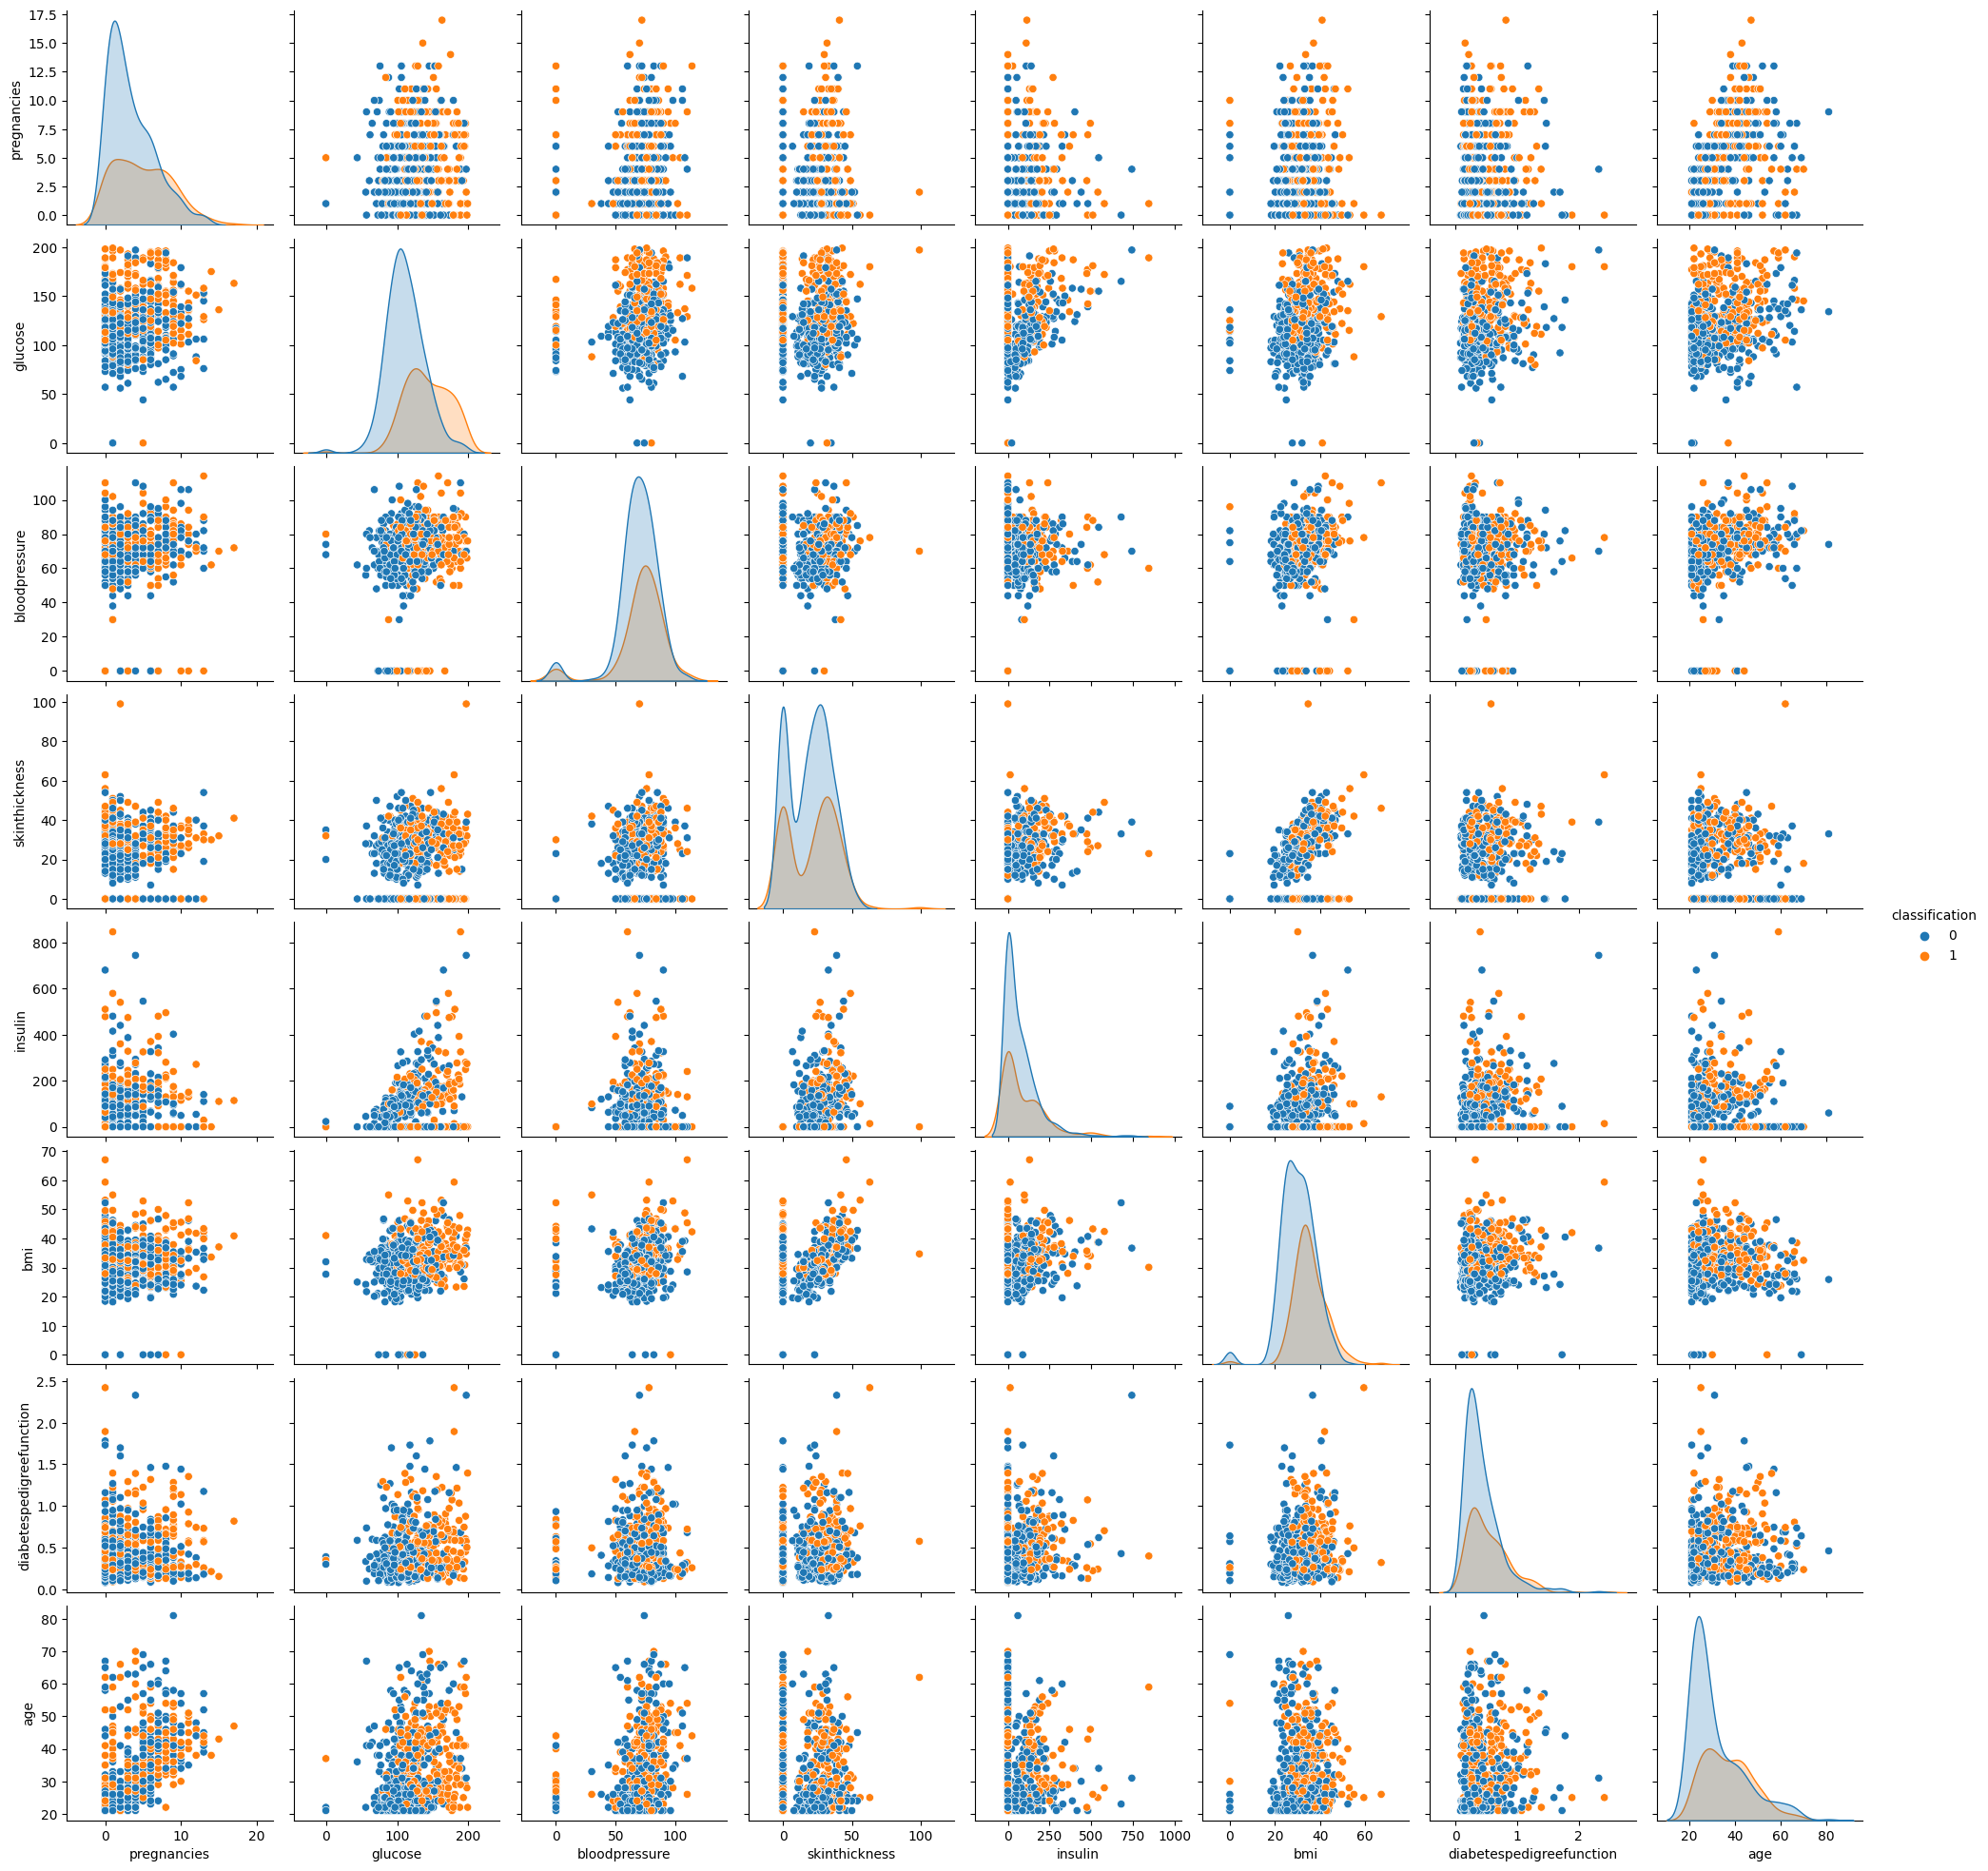

In [64]:
# Визуализация обученной классификации
sns.pairplot(X_train25, hue='classification')

In [65]:
# Укажите score модели (метрики) и постройте визуализацию обученной классификации для указанных k

def model_report(model, X_test, y_test, average='weighted'):
    # Проведите тестирование модели
    # Делаем предсказания на тестовом наборе
    y_pred = model.predict(X_test)

    # Оцениваем точность модели
    accuracy_eff = accuracy_score(y_test, y_pred)
    print(f"Правильность (accuracy) модели: {accuracy_eff}")

    precision_eff = precision_score(y_test, y_pred, average=average)
    print(f"Точность (precision) модели: {precision_eff}")

    recall_eff = recall_score(y_test, y_pred, average=average)
    print(f"Полнота (recall) модели: {recall_eff}")

    f1_eff = f1_score(y_test, y_pred, average=average)
    print(f"F1 мера модели: {f1_eff}")

In [66]:
knn_model_scores = KNeighborsClassifier()
knn_best_20, scores_20 = knn_classifier_wrapper(X_train, y_train, 10, knn_model_scores)

In [67]:
knn_best_20.fit(X_test, y_test)
# получим отчет для knn k=10, test 20%
model_report(knn_best_20, X_test, y_test)

Правильность (accuracy) модели: 0.7597402597402597
Точность (precision) модели: 0.7490873264666368
Полнота (recall) модели: 0.7597402597402597
F1 мера модели: 0.7399786360825321


In [68]:
knn_model_scores_25 = KNeighborsClassifier()
knn_best_25, scores_25 = knn_classifier_wrapper(X_train25, y_train25, 10, knn_model_scores_25)

In [69]:
knn_best_25.fit(X_test25, y_test25)
# получим отчет для knn k=15, test 25%
model_report(knn_best_25, X_test25, y_test25)

Правильность (accuracy) модели: 0.7760416666666666
Точность (precision) модели: 0.7691695727986051
Полнота (recall) модели: 0.7760416666666666
F1 мера модели: 0.7584638456841121


# 2. Работа с множественной линейной регрессией

In [70]:
# {SkinThickness, BMI} и Y = {Insulin} из датасета

X_regr = dataset[['skinthickness', 'bmi']]
y_regr = dataset['insulin']

In [71]:
# разбиваем dataset на test / train
from sklearn.model_selection import train_test_split
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_regr, y_regr, test_size = TEST_SIZE, random_state = RANDOM_SEED)

In [72]:
# инициализируем model как линейную регрессию
model = LinearRegression()
model.fit(X_train_r, y_train_r)

LinearRegression()

In [73]:
# Получим коэффициенты модели
b = model.intercept_
a1, a2 = model.coef_

# Предсказание на тестовом наборе
y_pred = model.predict(X_test_r)

# Оценка модели с помощью коэффициента детерминации (R^2)
score = r2_score(y_test_r, y_pred)

print(f'Коэффициент b (intercept): {b:.4f}')
print(f'Коэффициент a1 (skinthickness): {a1:.4f}')
print(f'Коэффициент a2: {a2:.4f}')
print(f'R^2 (коэффициент детерминации) = {score:.4f}')

Коэффициент b (intercept): -0.8220
Коэффициент a1 (skinthickness): 2.8496
Коэффициент a2: 0.6661
R^2 (коэффициент детерминации) = 0.2496


# 3. DecisionTree для задачи классификации

In [75]:
# Определим входные признаки X и целевую переменную y
X_dt = dataset.drop('outcome', axis=1)
y_dt = dataset['outcome']

# Разделим данные на обучающий и тестовый наборы
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, y_dt, test_size = TEST_SIZE, random_state = RANDOM_SEED)

# Создадим модель DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=RANDOM_SEED)

# Обучим модель на обучающем наборе данных
tree_model.fit(X_train_dt, y_train_dt)

# Сделаем предсказания на тестовом наборе
y_pred_dt = tree_model.predict(X_test_dt)

# Оценим производительность модели
accuracy_dt = accuracy_score(y_test_dt, y_pred_dt)
print(f'Точность модели DecisionTree: {accuracy_dt:.4f}')

Точность модели DecisionTree: 0.7812
